In [1]:
import nn
import sys
import numpy as np
reload(nn)
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from timeit import default_timer as timer 
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
np.unique(mnist.target)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [6]:
X_FULL = mnist.data 
Y_FULL = mnist.target


In [7]:
Y_FULL_MOD = np.zeros((Y_FULL.shape[0], 10))
for i in xrange(Y_FULL.shape[0]):
    Y_FULL_MOD[i][int(Y_FULL[i])] = 1

In [8]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(
      X_FULL, Y_FULL_MOD, test_size=0.33)

In [9]:
def print_work_time(func):
    def wrapper(*args, **kwargs):
        start = timer()
        result = func(*args, **kwargs)
        end = timer()
        print("Execution take {}".format(end - start))
        return result
    return wrapper

In [10]:
@print_work_time
def learn_on_model(X, Y, model, X_test = None, Y_test = None, learning_rate = 1e-4, batch_size = 20, max_epoch_num = 50, min_loss = 1e-3):
    loss = 1000
    epoch_num = 0
    loss_arr = np.zeros(max_epoch_num)
    test_loss_arr = np.zeros(max_epoch_num) if not (type(X_test) is None) else None
    
    while loss > min_loss and epoch_num < max_epoch_num:
 
        sys.stdout.write("Epoch {} ... ".format(epoch_num + 1))
        for bn, start in enumerate(xrange(0, X_TRAIN.shape[0], batch_size)):
            X_CUR = X[start:start + batch_size]
            Y_CUR = Y[start:start + batch_size]   
            loss = predictor.forward(X_CUR, Y_CUR)
            predictor.backward(alpha = learning_rate)
            

        loss = predictor.forward(X, Y)
        loss_arr[epoch_num] = loss
        sys.stdout.write("Loss : {0:.2f}\n".format(loss))
        if not (type(X_test) is None):
            loss_s = predictor.forward(X_test, Y_test)
            test_loss_arr[epoch_num] = loss_s
            
            
        epoch_num += 1
        


    return loss_arr, test_loss_arr

In [11]:
def make_classification_report(model, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST):
    print ("Train report")
    y_predicted = model.forward(X_TRAIN)

    indices = np.argmax(y_predicted, 1)
    real_indices = np.argmax( Y_TRAIN, 1)
    print (classification_report(real_indices, indices))
    
    print ("Test report")
    y_predicted = model.forward(X_TEST)
    indices = np.argmax(y_predicted, 1)
    real_indices = np.argmax(Y_TEST, 1)
    print (classification_report(real_indices, indices))

In [45]:
predictor = nn.Sequential()
predictor.add(nn.Linear(784, 250))
predictor.add(nn.Tanh(250))
predictor.add(nn.Linear(250, 10))
predictor.add(nn.CrossEntropy (10))


loss_arr, test_loss_arr = learn_on_model(X_TRAIN, Y_TRAIN, predictor, X_TEST, Y_TEST)
make_classification_report(predictor, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST)



Epoch 1 ... Loss : 55503.58
Epoch 2 ... Loss : 33117.85
Epoch 3 ... Loss : 23812.52
Epoch 4 ... Loss : 19145.05
Epoch 5 ... Loss : 16421.02
Epoch 6 ... Loss : 14635.71
Epoch 7 ... Loss : 13325.39
Epoch 8 ... Loss : 12314.53
Epoch 9 ... Loss : 11526.12
Epoch 10 ... Loss : 10876.46
Epoch 11 ... Loss : 10332.48
Epoch 12 ... Loss : 9863.78
Epoch 13 ... Loss : 9452.20
Epoch 14 ... Loss : 9107.56
Epoch 15 ... Loss : 8772.87
Epoch 16 ... Loss : 8470.00
Epoch 17 ... Loss : 8201.01
Epoch 18 ... Loss : 7954.71
Epoch 19 ... Loss : 7734.29
Epoch 20 ... Loss : 7528.62
Epoch 21 ... Loss : 7335.68
Epoch 22 ... Loss : 7149.16
Epoch 23 ... Loss : 6968.80
Epoch 24 ... Loss : 6814.09
Epoch 25 ... Loss : 6664.38
Epoch 26 ... Loss : 6526.94
Epoch 27 ... Loss : 6393.06
Epoch 28 ... Loss : 6274.22
Epoch 29 ... Loss : 6156.76
Epoch 30 ... Loss : 6035.23
Epoch 31 ... Loss : 5918.50
Epoch 32 ... Loss : 5810.36
Epoch 33 ... Loss : 5709.10
Epoch 34 ... Loss : 5609.28
Epoch 35 ... Loss : 5522.26
Epoch 36 ... Loss 

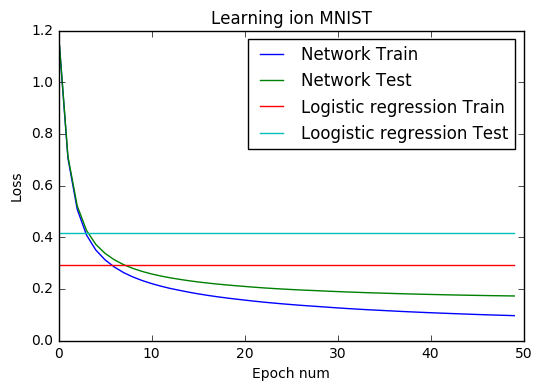

In [53]:
from sklearn import linear_model
from sklearn.metrics import log_loss
log_model = linear_model.LogisticRegression()

y_test = Y_TEST.argmax(axis = 1)
y_train = Y_TRAIN.argmax(axis = 1)

log_model.fit(X_TRAIN, y_train)
log_train = log_loss(y_train, log_model.predict_proba(X_TRAIN))
log_test =  log_loss(y_test, log_model.predict_proba(X_TEST))


x = np.arange(loss_arr.shape[0])
plt.plot(x, loss_arr / X_TRAIN.shape[0], x, test_loss_arr / X_TEST.shape[0], x,  
         np.full(loss_arr.shape[0], log_train),
        x, np.full(loss_arr.shape[0], log_test))

plt.legend(["Network Train", "Network Test", "Logistic regression Train",
           "Loogistic regression Test"])
plt.title("Learning ion MNIST")
plt.xlabel("Epoch num")
plt.ylabel("Loss")

Видим, что наша нейросеть смогла достаточно качественно распознавать цифры на изображениях. Кривая обучения достаточно гладкая, качество распознавания высокое. Таким образом hand-made сеть неплохо распознает цифры!) 

P.S Рассматривались и другие конфигурации сети, но особого улучшения на них получено не было. В данном отчете приведена одна из лучших попыток.

Оказалось, что инициальные значения весов в сети достаточно сильно влияют на способность сети обучаться и необходимо задавать их в районе $10^{-6}$, при больших значениях сеть начинала вести себя непредсказуемо. 

Видим, что нейросеть обучилась значительно лучше, нежели логистическая регрессия. 